# KNN 실습

## Classification
- query 데이터 포인트 $x_{new}$에서 각 데이터 포인트까지의 거리 D를 계산함
- k개의 최근접 이웃 계산
- 최근접 이웃들의 label값을 기반으로 $y_{new}$ 계산
    - classification의 경우에는 voting or weighted voting으로 계산

### Voting
- $\hat{y} = \argmax_{j} \sum_{(x_{(i)}, y_{(i)}) \in kNN(x)} I(y_{(i)} = j)$
    - $y_{(i)}$가 j인 경우에 1, 아니면 0으로 하고 시그마로 다 합친 후 argmax로 가장 많이 나온 label값 선택

- weighted version은 거리에 따라 가중치를 주던가 하는 방식으로 이루어짐  
    $\hat{y} = \argmax_{j} \sum_{(x_{(i)}, y_{(i)}) \in kNN(x)} w(x, x_i) \ I(y_{(i)} = j)$

    - 유클리디안 거리의 역수로 가중치 식이 이루어짐 => 거리가 멀수록 값이 작아짐  
    $\frac{1}{||x_{(i)} - x||_2}$



### forge dataset
- 이진 분류로 26개의 데이터 존재.

In [ ]:
# load forge dataset
import mglearn


X, y = mglearn.datasets.make_forge()

In [ ]:
# split train, test data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
# load KNN classifier, model-based learning
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
y_test_hat= clf.predict(X_test)
print(y_test)
print(y_test_hat)

[1 0 1 0 1 1 0]
[1 0 1 0 1 0 0]


In [19]:
# evaluate
from sklearn.metrics import accuracy_score


y_train_hat = clf.predict(X_train)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= clf.predict(X_test)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 0.94737
test accuracy: 0.85714


In [ ]:
# when k = 1
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)


y_train_hat = classifier.predict(X_train)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= classifier.predict(X_test)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 1.00000
test accuracy: 0.85714


### breast_cancer dataset
- 569 data points with 30 features
- binary classification (benign | malignant)
- benign(harmless): 357, malignant(cancerous tumors): 212

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [23]:
training_accuracy= []
test_accuracy= []
k_settings= range(1, 11) 

# k 개수에 따른 정확도 변화 측정
for k in k_settings:
    clf= KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
 
    y_train_hat= clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
 
    y_test_hat= clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))


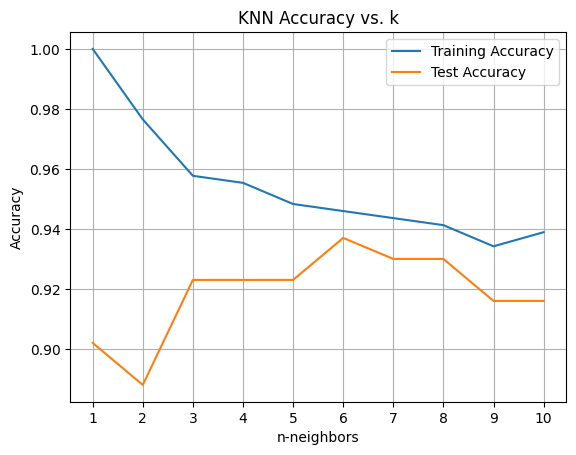

In [ ]:
# accuracy plot
import matplotlib.pyplot as plt


plt.plot(k_settings, training_accuracy, label='Training Accuracy')
plt.plot(k_settings, test_accuracy, label='Test Accuracy')
plt.xlabel("n-neighbors")
plt.xticks(ticks=range(1, 11))
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.legend()
plt.grid()
plt.show()

In [31]:
# 민코우스키 p값을 조정하여 accuracy 측정
import pandas as pd


training_accuracy = []
test_accuracy = []

p_setting = range(1, 6)
for p in p_setting:
    clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=p)
    clf.fit(X_train, y_train)
    
    y_train_hat= clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
 
    y_test_hat= clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))    
    
df = pd.DataFrame({
    "p": p_setting,
    "training_accuracy": training_accuracy,
    "test_accuracy": test_accuracy
})
df

,p,training_accuracy,test_accuracy
0,1,0.964789,0.937063
1,2,0.948357,0.923077
2,3,0.943662,0.930070
3,4,0.943662,0.923077
4,5,0.943662,0.923077


## Regression

- regression의 경우 averaging으로 값들의 평균으로 계산

### 

### Averaging

- $\hat{y} = \frac{1}{k} \sum_{(x_{(i)}, y_{(i)}) \in kNN(x)} y_i$

- weighted averaging의 경우 다음과 같이 계산됨  
    $y = \frac{1}{\sum_{(x_{(i)}, y_{(i)}) \in kNN(x)} w(x_{(i)}, x)}\sum_{x_i \in kNN(x)} w(x_{(i)}, x)y_{(i)}$

### wave dataset
- synthetic dataset
- single feature, continuous target

In [32]:
import mglearn
from sklearn.model_selection import train_test_split


X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsRegressor


reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
y_test_hat = reg.predict(X_test)
print(y_test)
print(y_test_hat)

[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print('MAE: %.5f'%mean_absolute_error(y_test,y_test_hat))
print('RMSE: %.5f'%mean_squared_error(y_test,y_test_hat)**0.5)
print('R_square: %.5f'%r2_score(y_test,y_test_hat))

MAE: 0.25372
RMSE: 0.32966
R_square: 0.83442


## Data Scaling

- Standard Scaling
    - 각 열의 feature의 평균을 0, 표준편차를 1로 간주해 정규화

- MinMax Scaling
    - 각 feature의 최솟값과 최댓값을 기준으로 0~1 사이의 값을 균등하게 배정

- Robust Scaling
    - 데이터에서 중앙값을 빼고 사분위 경계로 나눔

In [2]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, random_state=1)

In [3]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.14090
1,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.30300,0.18040,0.14890,0.2962,0.08472
2,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.29140,0.16090,0.3029,0.08216
3,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
4,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007


In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [5]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.305754,2.595219,0.462461,0.168272,0.604222,2.044178,2.093529,1.163667,1.181984,1.284296,...,0.244412,2.730521,0.613604,0.043615,0.426575,3.477829,4.416446,1.815497,2.101646,3.386099
1,0.233517,-0.053349,0.205731,0.086315,-0.474245,-0.124576,-0.366220,-0.016409,0.263950,-0.633174,...,-0.010357,0.082417,0.046617,-0.133978,-0.041719,0.309567,-0.440035,0.514384,0.147219,0.051824
2,0.155724,0.183459,0.113437,0.078562,0.159934,-0.639524,-0.183248,0.096223,-0.816308,-0.529925,...,0.555350,0.830586,0.460286,0.420072,0.638208,-0.441817,0.104699,0.694469,0.263409,-0.100112
3,-1.055627,-0.685603,-1.072681,-0.917106,-0.153894,-1.072608,-0.985935,-1.109322,0.286071,-0.118407,...,-1.013384,-0.622680,-1.052065,-0.851273,-0.167798,-1.081563,-1.110206,-1.362851,-0.340088,-0.585000
4,-0.630543,-0.430402,-0.660381,-0.618627,-0.923606,-0.945392,-0.775172,-0.666346,0.249202,-0.835245,...,-0.650289,0.012226,-0.669349,-0.626918,0.210439,-0.515075,-0.679522,-0.348523,0.388270,-0.817652


In [7]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled= scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.220124,0.414271,-0.176145,-0.513552,-0.058048,0.416430,0.194939,-0.062724,0.078788,-0.064821,...,-0.317681,0.640192,-0.220180,-0.641270,-0.068480,0.678897,1.000000,0.619244,0.199144,0.835100
1,-0.244735,-0.364897,-0.264184,-0.538664,-0.326713,-0.410070,-0.721649,-0.520974,-0.172727,-0.636124,...,-0.408040,-0.244670,-0.415409,-0.692981,-0.205838,-0.394450,-0.691624,0.023368,-0.336502,-0.368027
2,-0.271239,-0.295232,-0.295833,-0.541039,-0.168728,-0.606315,-0.653468,-0.477237,-0.468687,-0.605361,...,-0.207400,0.005330,-0.272972,-0.531656,-0.006406,-0.649005,-0.501880,0.105842,-0.304658,-0.422850
3,-0.683942,-0.550896,-0.702578,-0.846108,-0.246908,-0.771360,-0.952577,-0.945378,-0.166667,-0.482751,...,-0.763785,-0.480277,-0.793715,-0.901838,-0.242818,-0.865738,-0.925060,-0.836357,-0.470057,-0.597816
4,-0.539117,-0.475820,-0.561191,-0.754655,-0.438657,-0.722879,-0.874039,-0.773360,-0.176768,-0.696330,...,-0.635005,-0.268124,-0.661935,-0.836512,-0.131876,-0.673823,-0.775043,-0.371821,-0.270437,-0.681765


In [15]:
import numpy as np


print(np.max(X_train))
print(np.min(X_train))

4254.0
0.0


In [16]:
from sklearn.preprocessing import RobustScaler


print(np.median(X_train))
scaler = RobustScaler(quantile_range=(25.0, 75.0))
X_train_scaled= scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled).head()

0.1811


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.461905,2.097691,0.588947,0.461641,0.448941,1.730745,1.871707,1.117021,1.025326,1.228257,...,0.457265,2.001706,0.753222,0.425029,0.370642,2.955939,3.437557,1.348138,1.960123,3.020530
1,0.400000,0.051510,0.371966,0.382587,-0.348700,0.022270,-0.019336,0.267134,0.260936,-0.404396,...,0.240171,0.114269,0.285442,0.236684,-0.011009,0.437516,-0.181386,0.493382,0.231595,0.224462
2,0.333333,0.234458,0.293962,0.375108,0.120343,-0.383390,0.121332,0.348251,-0.638526,-0.316484,...,0.722222,0.647527,0.626730,0.824277,0.543119,-0.159753,0.224538,0.611688,0.334356,0.097051
3,-0.704762,-0.436945,-0.708507,-0.585297,-0.111766,-0.724559,-0.495770,-0.519980,0.279355,0.033909,...,-0.614530,-0.388289,-0.621002,-0.524035,-0.113761,-0.668281,-0.680783,-0.739852,-0.199387,-0.309568
4,-0.340476,-0.239787,-0.360044,-0.297389,-0.681051,-0.624343,-0.333736,-0.200949,0.248657,-0.576452,...,-0.305128,0.064241,-0.305251,-0.286098,0.194495,-0.217985,-0.359846,-0.073497,0.444785,-0.504666


### Scaling 시 성능 체크

In [18]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# standard 사용
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [20]:
clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
y_train_hat= clf.predict(X_train_scaled)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= clf.predict(X_test_scaled)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 0.94737
test accuracy: 0.85714


In [22]:
# MinMaxScaler 사용
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_train_hat= clf.predict(X_train_scaled)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= clf.predict(X_test_scaled)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 0.94737
test accuracy: 0.85714


In [23]:
# RobustScaler 사용
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_train_hat= clf.predict(X_train_scaled)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat= clf.predict(X_test_scaled)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 0.89474
test accuracy: 0.71429
